> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


**Link a GitHub:** 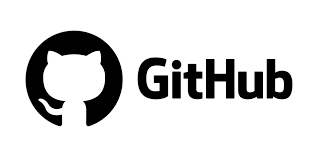

**https://github.com/GonzalezMaristany/Proyecto-Recomendacion-de-productos-bancarios**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
!pip install prettytable
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt # El modulo Pyplot de Matplotlib
!pip install seaborn
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
!pip install scikit-learn
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
# Modelos de Clasificacion:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# MULTINOMIAL NAVES BAYES
from sklearn.naive_bayes import MultinomialNB
# LIGHT GBM
!pip install lightgbm
import lightgbm as lgb
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
!pip install xgboost
import xgboost 
from xgboost import XGBClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

/kaggle/input/santander-product-recommendation/test_ver2.csv.zip
/kaggle/input/santander-product-recommendation/sample_submission.csv.zip
/kaggle/input/santander-product-recommendation/train_ver2.csv.zip
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.3 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 45.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 3.9 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.

In [2]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/tmp/ipykernel_14/190704024.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
#PRIMER PASO: LIMPIEZA DE NULOS
#-------------------------------
# columnas conyuemp y ult_fec_cli_1t
clientes.drop(['conyuemp', 'ult_fec_cli_1t'],axis=1, inplace=True)
# columna renta
clientes.loc[clientes["renta"].isnull(),"renta"] = np.nanmedian(clientes.renta)
# columna segmento
clientes.loc[clientes["segmento"].isnull(),"segmento"] = '02 - PARTICULARES'
# columna canal_entrada
clientes.loc[clientes["canal_entrada"].isnull(),"canal_entrada"] = 'KHE'
# columna indrel_1mes
clientes["indrel_1mes"] = clientes["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
# columna tiprel_1mes
clientes.loc[clientes["tiprel_1mes"].isnull(),"tiprel_1mes"] = 'I'
# columna nomprov
clientes.loc[clientes["nomprov"].isnull(),"nomprov"] = 'MADRID'
# columna cod_prov
clientes.drop(['cod_prov'],axis=1, inplace=True)
# columna sexo
clientes.loc[clientes["sexo"].isnull(),"sexo"] = 'V'
# columna tipodom
clientes.drop(['tipodom'],axis=1, inplace=True)
#columna indfall
clientes["indfall"].fillna('N', inplace=True)
# columna indext
clientes["indext"].fillna('N', inplace=True)
# columna ind_actividad_cliente
clientes["ind_actividad_cliente"].fillna(0.0, inplace=True)
# columna indresi
clientes["indresi"].fillna('S', inplace=True)
# columna indrel
clientes["indrel"].fillna(1.0, inplace=True)
# columna ind_nuevo
clientes["ind_nuevo"].fillna(0.0, inplace=True)
# columna fecha_alta
cust_ids = clientes[clientes.fecha_alta.isnull()]['ncodpers']
tmp = clientes[clientes.ncodpers.isin(cust_ids)].groupby(['ncodpers', 'fecha_dato']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['ncodpers', 'fecha_dato','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('ncodpers')['fecha_dato'].agg(['min', 'max']), on='ncodpers')
tmp.drop(['fecha_dato'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"ncodpers": "ncodpers", "min": "Min_fecha_dato", "max":"Max_fecha_dato"}, inplace=True)
# columna fecha_alta
clientes = clientes.merge(tmp, on='ncodpers', how = 'outer')
clientes.loc[clientes.fecha_alta.isnull(), 'fecha_alta'] = clientes.Min_fecha_dato
clientes.drop(columns=['Min_fecha_dato', 'Max_fecha_dato'], inplace=True)
# columna pais_residencia
clientes.loc[clientes["pais_residencia"].isnull(),"pais_residencia"] = 'ES'
# columna ind_empleado
clientes.loc[clientes["ind_empleado"].isnull(),"ind_empleado"] = "N"
# columnas ind_nomina_ult1 y ind_nom_pens_ult1
clientes["ind_nomina_ult1"].fillna(0.0, inplace=True)
clientes["ind_nom_pens_ult1"].fillna(0.0, inplace=True)
#----------------------------------------------------------
#SEGUNDO PASO: TRANSFORMACION DE DATOS
#----------------------------------------------------------
#columna age
clientes['age'] = pd.to_numeric(clientes.age, errors='coerce')
clientes = clientes[((clientes["age"] > 15) & (clientes["age"] < 100))]
#columnas ind_ahor_fin_ult1 e ind_aval_fin_ult1
clientes.drop(columns=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],inplace = True)
#variable fecha_dato
clientes['fecha_dato'] = clientes['fecha_dato'].replace('-','',regex=True).str.strip(' ,')
clientes['fecha_dato'] = clientes['fecha_dato'].astype("float64")
#variable fecha_alta
clientes['fecha_alta'] = clientes['fecha_alta'].replace('-','',regex=True).str.strip(' ,')
clientes['fecha_alta'] = clientes['fecha_alta'].astype("float64")
#variable antiguedad
clientes["antiguedad"] = pd.to_numeric(clientes["antiguedad"],errors = 'coerce')
#------------------------------------------------------------
#TERCER PASO: TRANSFORMAMOS COLUMNAS CATEGÓRICAS A NUMÉRICAS CON LABELENCODER
#------------------------------------------------------------
cat_columns = clientes.select_dtypes(include='object').columns
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categorico 
le.fit(clientes[cat_columns])

#transformacion de las categoricas en train dataset
clientes[cat_columns] = le.transform(clientes[cat_columns])
#--------------------------------------------------------------
#CUARTO PASO: LIMPIEZA DE OUTLIERS
#--------------------------------------------------------------
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05) 
K =iso.fit_predict(clientes)
K
clientes["outliers"] = K
clientes = clientes.loc[clientes["outliers"] != -1, :]
clientes = clientes.drop(columns=['outliers']) 

/usr/local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [4]:
#se exporta a csv el dataset 
clientes.to_csv('clientes_tratado.csv',header=True,index=False)

In [ ]:
try:
    clientes.to_csv('clientes_tratado.csv', header=True, index=False, encoding='utf-8')
    print('Exportación exitosa')
except Exception as e:
    print('Error al exportar el archivo:', e)

In [5]:
clientes_tratado=pd.read_csv('clientes_tratado.csv', header=0)

# **SECCIÓN 5: SELECCION DE VARIABLES (FEATURE SELECTION)**
![](https://cdn-icons-png.flaticon.com/128/2893/2893657.png)

El método de selección de características "Forward Selection" es un enfoque de envoltura (wrapper) para la selección de variables en modelos de aprendizaje automático. El objetivo es seleccionar un subconjunto óptimo de variables que maximice el rendimiento del modelo predictivo. El proceso de selección comienza con un conjunto vacío de variables y se agregan una por una las variables más relevantes, utilizando algún criterio de selección, hasta que se alcanza un criterio de parada.
En el caso de "Forward Selection", el proceso comienza con un conjunto vacío de variables, y se evalúa el rendimiento del modelo con cada variable de manera individual. Se selecciona la variable que proporciona el mejor rendimiento y se agrega al conjunto de variables seleccionadas. Luego, se evalúa el rendimiento del modelo con cada combinación de la variable seleccionada y las variables restantes, y se selecciona la combinación que proporcione el mejor rendimiento. Este proceso se repite hasta que se alcanza un criterio de parada, como una cantidad fija de variables seleccionadas o una mejora en el rendimiento que no justifique agregar más variables.
El método de "Forward Selection" puede ser computacionalmente costoso ya que se deben ajustar varios modelos, uno para cada combinación de variables. Sin embargo, puede ser útil para identificar el menor conjunto de variables que maximiza el rendimiento del modelo y eliminar la necesidad de incluir variables irrelevantes o redundantes en el modelo final.

**Utilizaremos el método de selección de características "Forward Selection" para determinar el menor conjunto de variables que permita clasificar si un cliente adquirirá el producto ind_cco_fin_ult1, que ha sido identificado como el producto más adquirido según el análisis exploratorio de datos previo.**

El siguiente código implementa la técnica de selección de características hacia adelante utilizando el modelo de Regresión Lineal Ordinaria (OLS) de Statsmodels. La función forward_selection toma como entrada un conjunto de datos data y la variable objetivo target y devuelve una lista de las mejores características seleccionadas best_features y una lista de los valores p más bajos encontrados en cada iteración p_values.
En la función forward_selection, se itera sobre todas las características disponibles, se ajusta un modelo OLS con características seleccionadas actuales y cada nueva característica, y se guarda el valor p de la nueva característica. Si el valor p más bajo es menor que el nivel de significancia especificado, la nueva característica se agrega a la lista de las mejores características. El proceso se repite hasta que ninguna nueva característica se agrega o hasta que todas las características se han seleccionado.
Finalmente, la función traza los valores p más bajos encontrados en cada iteración. El código también importa los paquetes necesarios, como statsmodels.api y matplotlib.pyplot, y divide el conjunto de datos en variables independientes X y la variable objetivo y, que se pasan a la función forward_selection.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 38.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 21.3 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


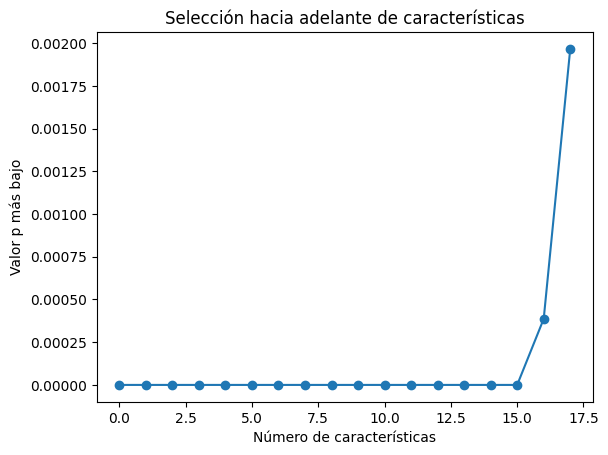

In [7]:
!pip install statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

def forward_selection(data, target, significance_level=0.01):
    """
    Realiza selección hacia adelante de características utilizando OLS.
    
    Parámetros:
    data (pandas.DataFrame): datos de características.
    target (pandas.Series): variable objetivo.
    significance_level (float): nivel de significancia.
    
    Retorna:
    best_features (list): lista de características seleccionadas.
    p_values (list): lista de los valores p más bajos encontrados en cada iteración.
    """
    # lista de todas las características iniciales
    initial_features = data.columns.tolist()
    
    # lista de las mejores características seleccionadas
    best_features = []
    
    # lista de valores p más bajos encontrados en cada iteración
    p_values = []
    
    while initial_features:
        # calcula las características restantes
        remaining_features = list(set(initial_features) - set(best_features))
        
        # crea una serie vacía para el nuevo valor p
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            # ajusta un modelo OLS con características seleccionadas actuales y la nueva característica
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            
            # guarda el valor p de la nueva característica
            new_pval[new_column] = model.pvalues[new_column]
        
        # encuentra la nueva característica con el valor p más bajo
        min_p_value = new_pval.min()
        
        # si el valor p más bajo es menor que el nivel de significancia, agrega la nueva característica a la lista de las mejores características
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
            p_values.append(min_p_value)
        else:
            break
    
    # traza los valores p más bajos encontrados en cada iteración
    plt.plot(p_values, 'o-')
    plt.xlabel('Número de características')
    plt.ylabel('Valor p más bajo')
    plt.title('Selección hacia adelante de características')
    plt.show()
    
    return best_features, p_values


# split input y target
X = clientes_tratado.iloc[:, 0:20] #variables independientes
y = clientes_tratado.iloc[:, 20]   #target variable

# realiza la selección hacia adelante y traza los valores p más bajos encontrados
best_features, p_values = forward_selection(data=X, target=y, significance_level=0.01)

In [8]:
best_features

['indrel',
 'indrel_1mes',
 'canal_entrada',
 'tiprel_1mes',
 'indfall',
 'ncodpers',
 'age',
 'indext',
 'segmento',
 'fecha_dato',
 'indresi',
 'ind_nuevo',
 'ind_actividad_cliente',
 'fecha_alta',
 'renta',
 'ind_empleado',
 'nomprov',
 'sexo']

In [10]:
# lista de todas las características iniciales
initial_features = X.columns.tolist()

# lista de las mejores características seleccionadas
#best_features = forward_selection(X, y, significance_level=0.01)[0]

# lista de características que no fueron seleccionadas
not_selected_features = list(set(initial_features) - set(best_features))

print("Características no seleccionadas por el forward selection:")
print(not_selected_features)

Características no seleccionadas por el forward selection:
['pais_residencia', 'antiguedad']


**El resultado indica que las características 'pais_residencia' y 'antiguedad' no fueron seleccionadas por el algoritmo de selección hacia adelante (forward selection). Esto significa que según los criterios del algoritmo, estas características no aportan una mejora significativa en la capacidad predictiva del modelo y por lo tanto se pueden descartar sin perder información relevante.**

In [12]:
# eliminamos características no seleccionadas del DataFrame
clientes_tratado.drop(columns=['pais_residencia', 'antiguedad'],inplace = True)

In [13]:
clientes_tratado.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')